In [1]:
import os
os.chdir('../')

In [2]:
import pyreadr
globalumap = pyreadr.read_r('../datas/elegans/globalumap2d_Qin.rds')
globalumap = globalumap[None]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import phylovelo as pv
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter

/home/wangkun/LineageTracingwithscRNA/phylovelo/sim_utils.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
cell_annotation = pd.read_csv('../datas/elegans/GSE126954_cell_annotation.csv', index_col=0)

In [6]:
count_all = pd.read_csv('/home/wangkun/datas/elegans/Celegans_pass_qc_counts.csv', engine='c', low_memory=False)

In [7]:
count_all = count_all.T

In [156]:
sel_cells = globalumap[(globalumap.V1<0.69)&(globalumap.V2>0.75)].index
sel_cells = np.random.choice(sel_cells, 2000, replace=False)
sel_cells = sel_cells[np.isin(sel_cells, cell_annotation.index)]

In [157]:
count = count_all.loc[sel_cells]
xdr = globalumap.loc[sel_cells]

In [11]:
# count = pd.read_csv('./results/c_eles_conv_sample.csv', index_col=0)
# xdr = globalumap.loc[count.index]

In [158]:
sd = scData(count=count, Xdr=xdr)

In [21]:
import pickle
with open('/raid/wangkun/results_sd/celegans.pkl', 'rb') as f:
    sd_ab = pickle.load(f)

In [33]:
from collections import defaultdict

In [159]:
vel_dict = defaultdict(int, zip(sd_ab.count.columns, sd_ab.velocity))

In [162]:
sd.count = sd.count[sd_ab.count.columns]

In [163]:
sd.velocity = sd_ab.velocity

In [168]:
sd = velocity_embedding(sd, target='count', n_neigh=200)

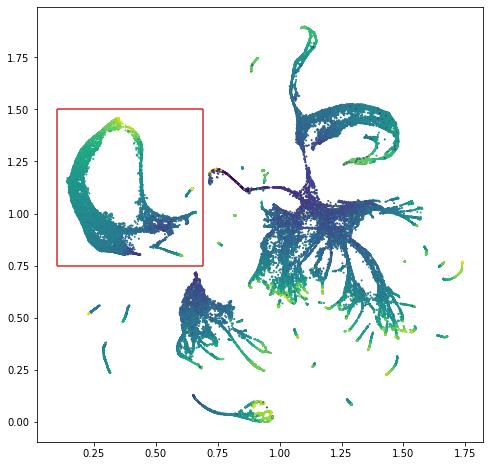

In [410]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(globalumap.V1[global_umap_sel_ind], globalumap.V2[global_umap_sel_ind], c=cell_annotation.loc[global_umap_sel_ind]['embryo.time'], s=1)
ax.hlines(0.75, 0.1, 0.69,colors='tab:red')
ax.hlines(1.5, 0.1, 0.69,colors='tab:red')
ax.vlines(0.1, 0.75, 1.5,colors='tab:red')
ax.vlines(0.69, 0.75, 1.5,colors='tab:red')
# ax.scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:, 1], c='tab:red', s=2, alpha=0.3)
# plt.savefig('./figures/C.elegans/globalumap_embryotime.pdf', dpi='figure', format='pdf')

In [328]:
global_umap_sel_ind = globalumap.index[np.isin(globalumap.index, cell_annotation.index)]

In [264]:
color_map = defaultdict(lambda : '#8dd3c7', {'BWM_posterior':'#ffffb3',
                                     'BWM_head_row_1':'#bebada',
                                     'BWM_head_row_2': '#fb8072',
                                     'BWM_anterior': '#80b1d3',
                                     'BWM_far_posterior': '#fdb462',
                                     'mu_int_mu_anal': '#b3de69',
                                     'mu_sph': '#fccde5',
                                    })

In [265]:
cell_type_colors = np.array(cell_annotation.loc[sd.count.index]['cell.subtype'])

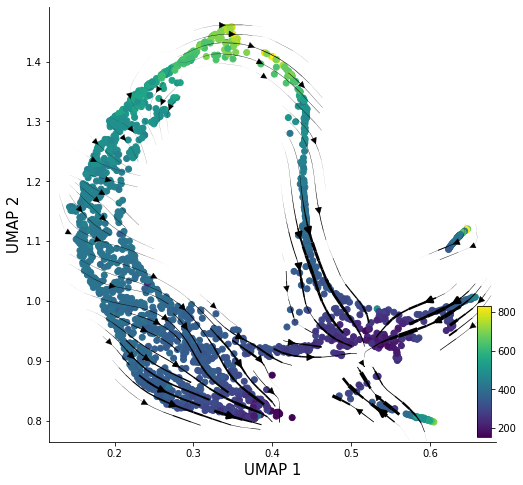

In [352]:
fig, ax = plt.subplots()

scatter = ax.scatter(sd.Xdr.iloc[:, 0], sd.Xdr.iloc[:, 1], c=cell_annotation.loc[sd.count.index]['embryo.time'])

ax = velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'stream',streamdensity=1.5, grid_density=30, radius=0.02, lw_coef=100000, arrowsize=1.5)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('./figures/C.elegans/stream_embryotime.pdf', dpi='figure', format='pdf')

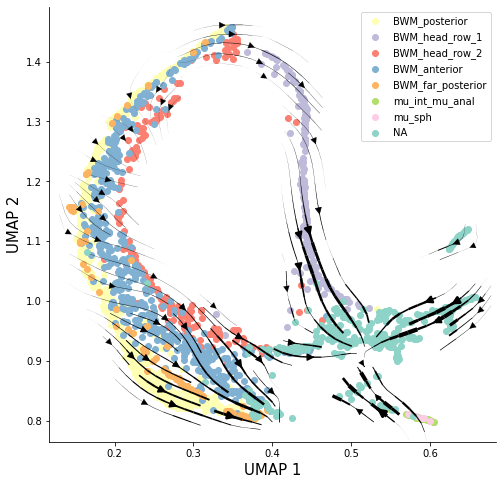

In [351]:
fig, ax = plt.subplots()
for i in list(color_map.keys())[:-1]:
    cond = np.where(cell_type_colors==i)[0]
    ax.scatter(sd.Xdr.iloc[cond, 0], sd.Xdr.iloc[cond, 1], c=color_map[i], label=i)
cond = [type(i)!=str for i in cell_type_colors]
ax.scatter(sd.Xdr.iloc[cond, 0], sd.Xdr.iloc[cond, 1], c=color_map['nan'], label='NA')
ax = velocity_plot(sd.Xdr.to_numpy(), sd.velocity_embeded, ax, 'stream',streamdensity=1.5, grid_density=30, radius=0.02, lw_coef=100000, arrowsize=1.5)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
# cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
# plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.savefig('./figures/C.elegans/stream_celltype.pdf', dpi='figure', format='pdf')

In [8]:
ab_lin_cells = cell_annotation[cell_annotation.lineage.apply(lambda x: 'AB' in str(x))].index

In [9]:
ab_lin_cells = ab_lin_cells[np.isin(ab_lin_cells, globalumap.index)]

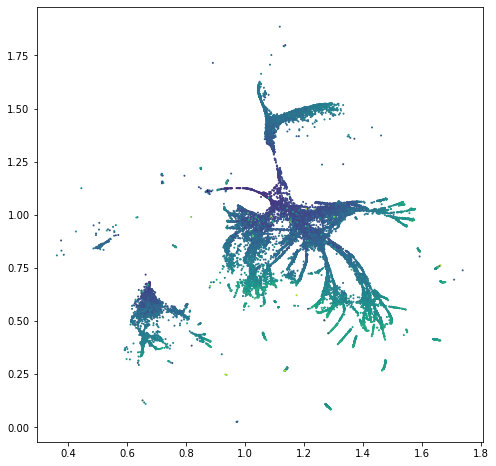

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(globalumap.V1[ab_lin_cells], globalumap.V2[ab_lin_cells], c=cell_annotation.loc[ab_lin_cells]['embryo.time'], s=1)

In [13]:
import pickle
with open('/raid/wangkun/results_sd/celegans.pkl', 'rb') as f:
    sd_pe1 = pickle.load(f)

In [15]:
sd_ab = pv.data_struct.scData(count=count_all.loc[ab_lin_cells], Xdr=globalumap.loc[ab_lin_cells])
sd_ab.count = sd_ab.count[sd_pe1.count.columns]
sd_ab.velocity = sd_pe1.velocity

In [16]:
cond = ~((sd_ab.Xdr.iloc[:,1]>0.75) & (sd_ab.Xdr.iloc[:,0]<0.9))
cond = cond & ~(sd_ab.Xdr.iloc[:,1]<0.25)
cond = cond & ~(sd_ab.Xdr.iloc[:,1]>1.65)
cond = cond & ~(sd_ab.Xdr.iloc[:,0]>1.55)
cond = cond & ~((sd_ab.Xdr.iloc[:,0]>1.2)&(sd_ab.Xdr.iloc[:,1]>1.1)&(sd_ab.Xdr.iloc[:,1]<1.45))
cond = cond & ~((sd_ab.Xdr.iloc[:,0]>1)&(sd_ab.Xdr.iloc[:,0]<1.2)&(sd_ab.Xdr.iloc[:,1]<0.5))
# cond = cond & ~((sd_ab.Xdr.iloc[:,1]>1.08)&(sd_ab.Xdr.iloc[:,0]<1)&(cell_annotation.loc[sd_ab.count.index].lineage.apply(lambda x: len(x.split('/')[0]))>8))

In [17]:
cond = ~((globalumap.loc[ab_lin_cells].iloc[:,1]>0.75) & (globalumap.loc[ab_lin_cells].iloc[:,0]<0.9))
cond = cond & ~(globalumap.loc[ab_lin_cells].iloc[:,1]<0.25)
cond = cond & ~(globalumap.loc[ab_lin_cells].iloc[:,1]>1.65)
cond = cond & ~(globalumap.loc[ab_lin_cells].iloc[:,0]>1.55)
cond = cond & ~((globalumap.loc[ab_lin_cells].iloc[:,0]>1.2)&(globalumap.loc[ab_lin_cells].iloc[:,1]>1.1)&(globalumap.loc[ab_lin_cells].iloc[:,1]<1.45))
cond = cond & ~((globalumap.loc[ab_lin_cells].iloc[:,0]>1)&(globalumap.loc[ab_lin_cells].iloc[:,0]<1.2)&(globalumap.loc[ab_lin_cells].iloc[:,1]<0.5))

In [18]:
sd_ab.count = sd_ab.count.loc[cond]
sd_ab.Xdr = sd_ab.Xdr.loc[cond]

In [19]:
sd_ab = pv.embedding.velocity_embedding(sd_ab, target='count', n_neigh=200)

  0%|          | 0/29600 [00:00<?, ?it/s]

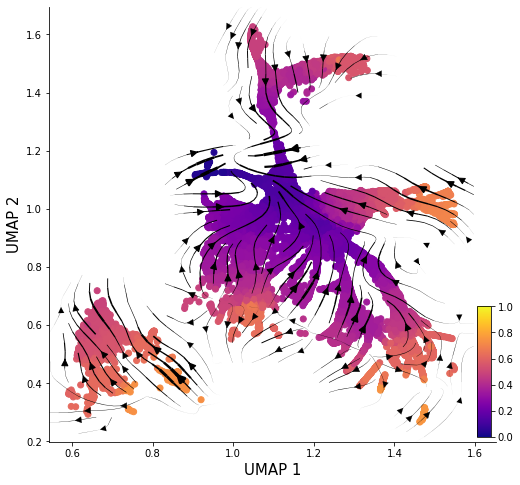

In [52]:
fig, ax = plt.subplots()
# scatter = ax.scatter(sd_ab.Xdr.iloc[:, 0], sd_ab.Xdr.iloc[:, 1], c=cell_annotation.loc[sd_ab.count.index].lineage.apply(lambda x: len(x.split('/')[0])))
scatter = ax.scatter(globalumap.loc[ab_lin_cells].iloc[:, 0][cond], globalumap.loc[ab_lin_cells].iloc[:, 1][cond], c=time, cmap='plasma')

ax = pv.ana_utils.velocity_plot(sd_ab.Xdr.to_numpy(), sd_ab.velocity_embeded, ax, 'stream',streamdensity=1.5, grid_density=40, radius=0.08, lw_coef=50000, arrowsize=1.5)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('./figures/pv_stream.pdf', dpi='figure', format='pdf')

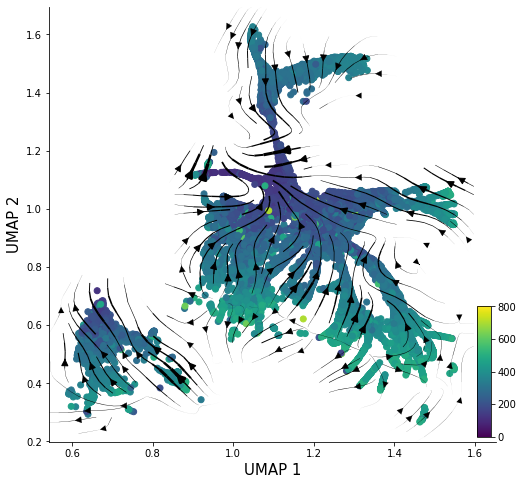

In [565]:
fig, ax = plt.subplots()
scatter = ax.scatter(globalumap.loc[ab_lin_cells].iloc[:, 0][cond], globalumap.loc[ab_lin_cells].iloc[:, 1][cond], c=cell_annotation.loc[ab_lin_cells]['embryo.time'][cond])
ax = velocity_plot(sd_ab.Xdr.to_numpy(), sd_ab.velocity_embeded, ax, 'stream',streamdensity=1.5, grid_density=40, radius=0.08, lw_coef=50000, arrowsize=1.5)
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [35]:
from scipy.stats import spearmanr

In [33]:
from sklearn.neighbors import NearestNeighbors

In [32]:
pt_map = pd.read_csv('/raid/wangkun/results_sd/phylotime.csv', index_col=0)

In [36]:
pseudo_time = dict()
for i in pt_map.index:
    if i in sd_ab.count.index:
        pseudo_time[i] = float(pt_map.loc[i])

In [37]:
pts = sd_ab.Xdr.loc[pseudo_time.keys()]

In [38]:
pseudo_time_full = dict()
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(pts.to_numpy())

NearestNeighbors()

In [39]:
for ind, name in enumerate(globalumap.loc[ab_lin_cells].iloc[:, 1][cond].index):
    if name in pseudo_time:
        pseudo_time_full[name] = pseudo_time[name]
    else:
        # dis, neigh = get_nearest_neighbor(xdr, sd.Xdr.loc[name], n_neighbors=5)
        neighbor = neigh.kneighbors([globalumap.loc[name].to_numpy()])
        neighbors = neighbor[1][0]
        pseudo_time_full[name] = np.mean([pseudo_time[pts.index[i]] for i in neighbors])
for ind, name in enumerate(globalumap.loc[ab_lin_cells].iloc[:, 1][cond].index):
    pseudo_time[ind] = pseudo_time_full[name]

In [40]:
time = np.array([pseudo_time[i] for i in range(globalumap.loc[ab_lin_cells].iloc[:, 1][cond].shape[0])])
time = time - min(time)
time = time / max(time)
    # sd.phylo_pseudotime = time

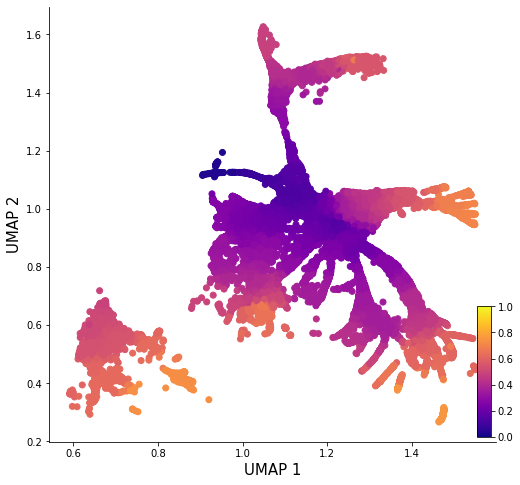

In [41]:
fig, ax = plt.subplots()
scatter = ax.scatter(globalumap.loc[ab_lin_cells].iloc[:, 0][cond], globalumap.loc[ab_lin_cells].iloc[:, 1][cond], c=time, cmap='plasma')
ax.figure.set_size_inches(8,8)
ax.set_xlabel('UMAP 1', fontsize=15)
ax.set_ylabel('UMAP 2', fontsize=15)
cbaxes = inset_axes(ax, width="3%", height="30%", loc='lower right') 
plt.colorbar(scatter, cax=cbaxes, orientation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

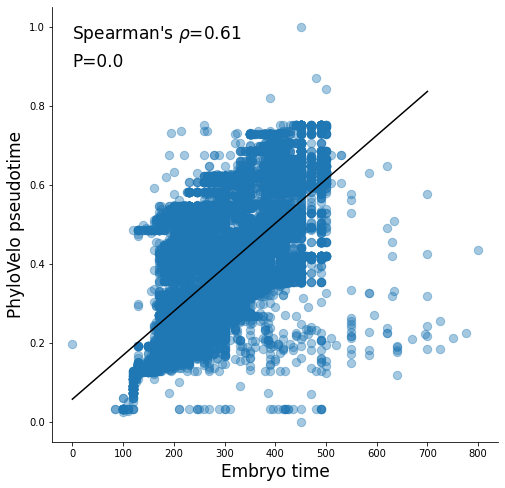

In [48]:
x = cell_annotation.loc[globalumap.loc[ab_lin_cells][cond].index]['embryo.time'].to_numpy()
y = time

a, b = np.polyfit(x, y, deg=1)
y_est = a * np.linspace(0,700,100) + b

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, alpha=0.4, s=70)
ax.plot(np.linspace(0,700,100), y_est, '-', c='k')
ax.set_xlabel('Embryo time', fontsize=17)
ax.set_ylabel('PhyloVelo pseudotime', fontsize=17)
rho, pval = spearmanr(x, y)
ax.text(0, 0.97, r"Spearman's $\rho$={:.2g}".format(rho), fontsize=17)
# ax.text(0, 0.9, r'$p={}\times 10^{}$'.format(*r'{:.2g}'.format(pval).split('e')).replace('^', '^{').replace('$', '}$')[1:], fontsize=15)
ax.text(0, 0.9, r'P={}'.format(pval), fontsize=17)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('./figures/pvpt_corr.pdf', dpi='figure', format='pdf')

In [589]:
len(globalumap.loc[ab_lin_cells].iloc[:, 0][cond])

29600